Stephanie Rivera

Time series analysis on the Kaggle dataset "Trending YouTube Video Statistics"

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import statsmodels.api as sm

/Users/stephanier/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
usa_trending = pd.read_csv("../data/USvideos.csv")

In [3]:
usa_trending.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [4]:
#keep relevant columns
youtube_views = usa_trending[['trending_date', 'category_id','views','likes','dislikes','comment_count']].copy()

In [5]:
INPUT_FORMAT = '%y.%d.%m'
OUTPUT_FORMAT = '%m-%d-%Y'

datetime.strptime('17.14.11',INPUT_FORMAT).strftime(OUTPUT_FORMAT)

'11-14-2017'

In [6]:
#change weird trending date format
for index, row in youtube_views.iterrows():
    string = row['trending_date']
    changed_date = datetime.strptime(string,INPUT_FORMAT).strftime(OUTPUT_FORMAT)
    #row['trending_date'] = changed_date
    youtube_views.set_value(index,'trending_date',changed_date)

In [7]:
#youtube_views.index = pd.to_datetime(youtube_views.trending_date)

In [8]:
youtube_views.head()
youtube_views['trending_date'] = pd.to_datetime(youtube_views['trending_date'])

In [9]:
youtube_views.head()
youtube_views2 = youtube_views.groupby('trending_date')['views'].agg({"views": "sum"})
#youtube_views2

/Users/stephanier/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


# All Categories

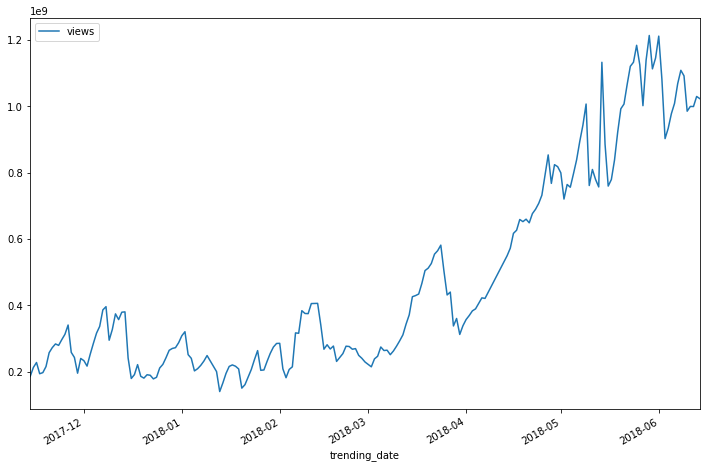

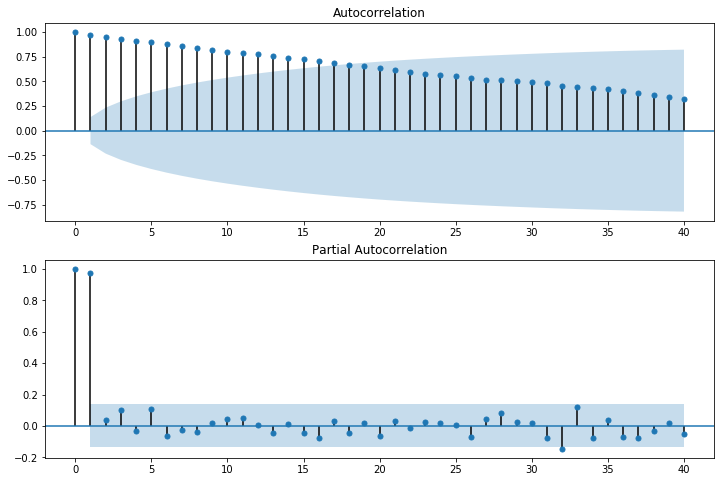

In [10]:
dta = youtube_views2

dta.plot(figsize=(12,8));
plt.show()

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)
plt.show()

In [11]:
def get_categoryinfo(data_frame,category):
    cat = category
    data_frame = data_frame.loc[data_frame['category_id'] == cat]
    data_frame['trending_date'] = pd.to_datetime(data_frame['trending_date'])
    data_frame2 = data_frame.groupby('trending_date')['views'].agg({"views": "sum"})
    return data_frame2

In [12]:
#filter data by top 3 categories: music(10), entertainment(24), people & blogs (22)

music = get_categoryinfo(youtube_views,10)
entertainment = get_categoryinfo(youtube_views,24)
ppl_blogs = get_categoryinfo(youtube_views,22)


/Users/stephanier/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/stephanier/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """


In [43]:

sports = get_categoryinfo(youtube_views,17)

/Users/stephanier/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/stephanier/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """


In [47]:
travel = get_categoryinfo(youtube_views,19)
gaming = get_categoryinfo(youtube_views,20)
vid_blog = get_categoryinfo(youtube_views,21)
horror = get_categoryinfo(youtube_views,39)
comedy = get_categoryinfo(youtube_views,23)

/Users/stephanier/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/stephanier/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """


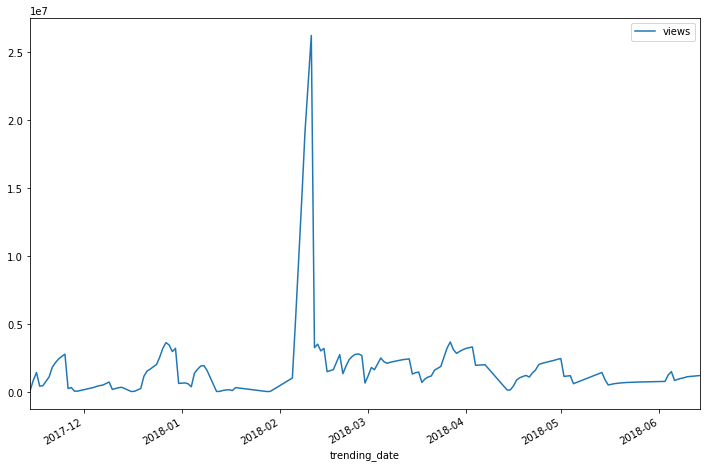

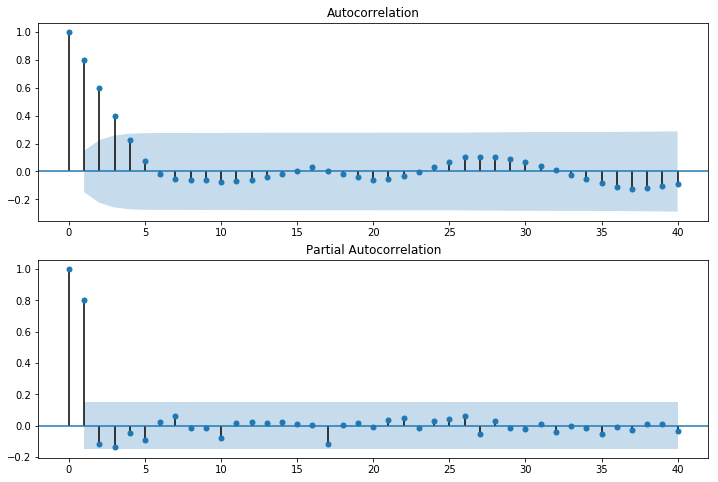

In [48]:
dta = travel

dta.plot(figsize=(12,8));
plt.show()

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)
plt.show()

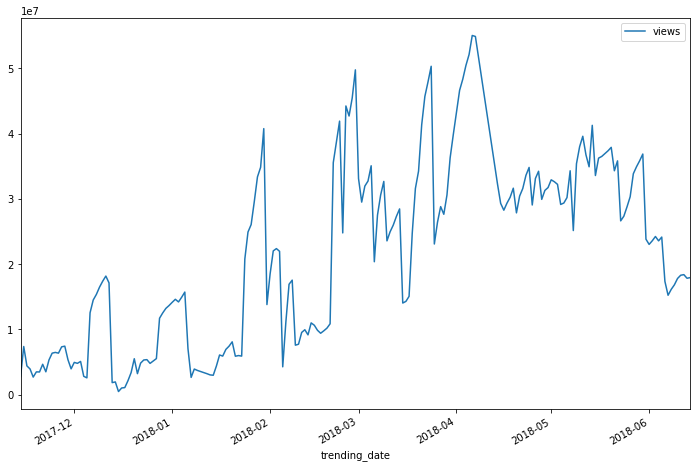

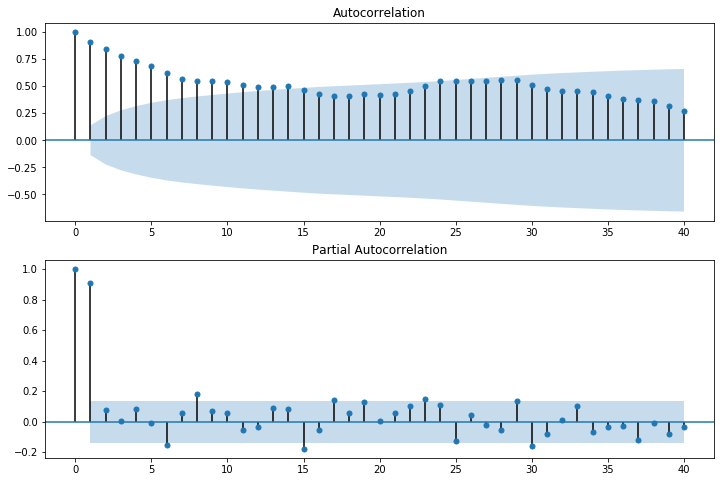

In [46]:
dta = sports

dta.plot(figsize=(12,8));
plt.show()

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)
plt.show()

# Music

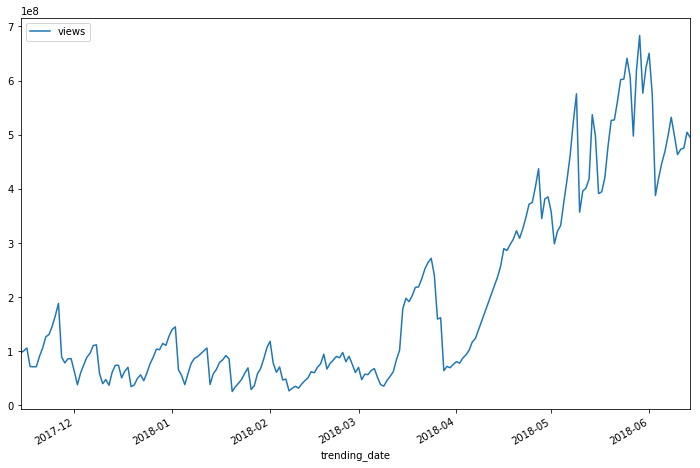

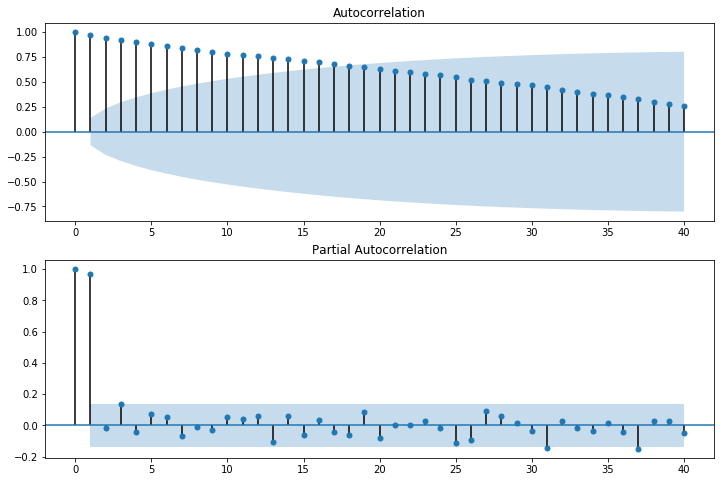

In [13]:
dta = music


dta.plot(figsize=(12,8));
plt.show()

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)
plt.show()

# Entertainment

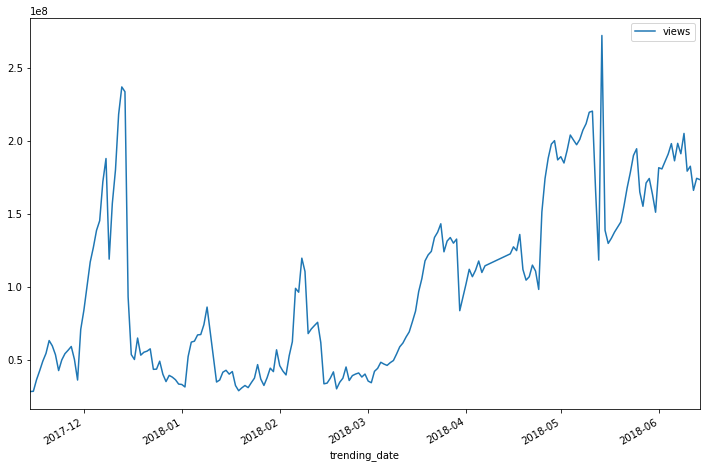

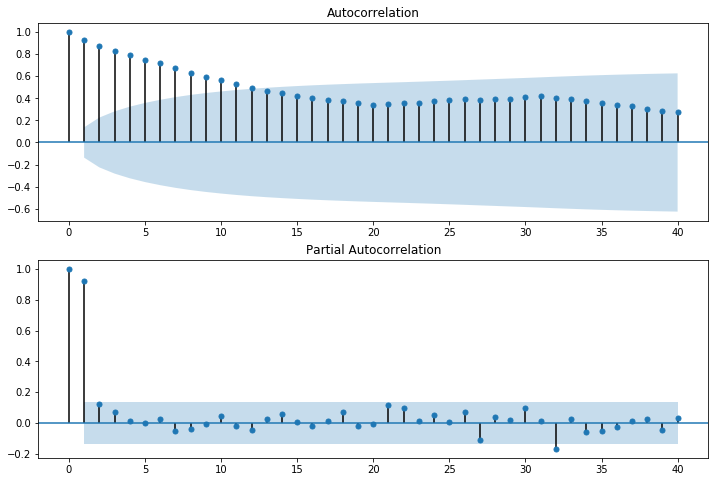

In [14]:
dta = entertainment


dta.plot(figsize=(12,8));
plt.show()

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)
plt.show()

# People & Blogs

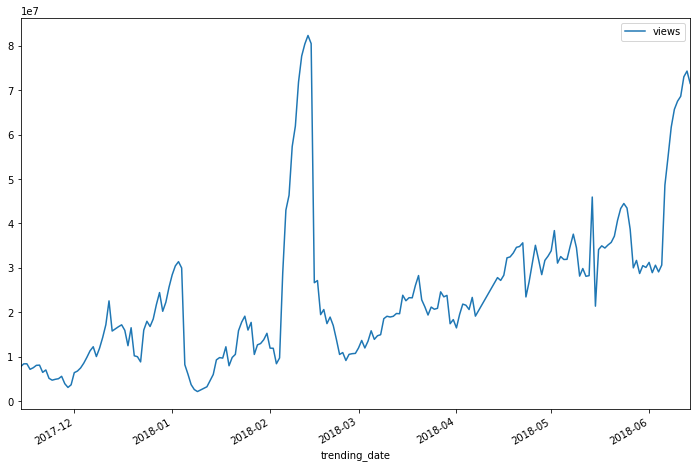

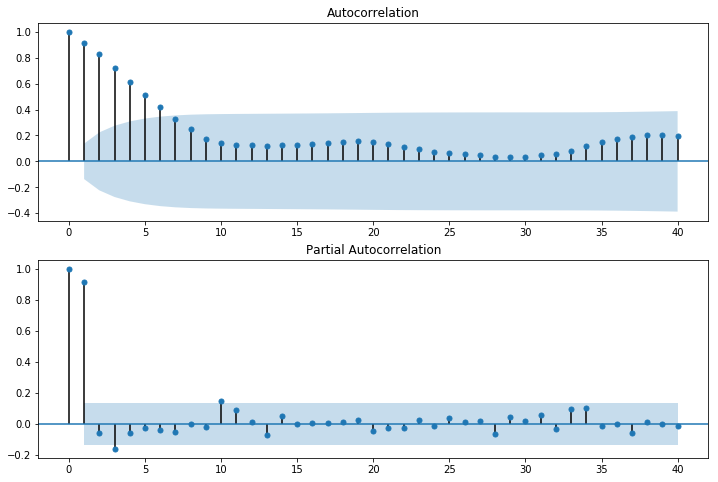

In [15]:
dta = ppl_blogs


dta.plot(figsize=(12,8));
plt.show()

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)
plt.show()

In [16]:
dta = dta.astype('float32').asfreq("1d").ffill()

arma_mod10 = sm.tsa.ARMA(dta, (1,0)).fit(disp=False)
print(arma_mod10.params)
print(arma_mod10.aic, arma_mod10.bic, arma_mod10.hqic)

arma_mod20 = sm.tsa.ARMA(dta, (2,0)).fit(disp=False)
print(arma_mod20.params)
print(arma_mod20.aic, arma_mod20.bic, arma_mod20.hqic)

arma_mod30 = sm.tsa.ARMA(dta, (3,0)).fit(disp=False)
print(arma_mod30.params)
print(arma_mod30.aic, arma_mod30.bic, arma_mod30.hqic)


const          2.364511e+07
ar.L1.views    9.520207e-01
dtype: float64
7245.55567005471 7255.63954655 7249.63090019
const          2.364511e+07
ar.L1.views    9.896510e-01
ar.L2.views   -4.089875e-02
dtype: float64
7247.212267265841 7260.65743593 7252.64590744
const          2.364511e+07
ar.L1.views    9.824001e-01
ar.L2.views    1.424612e-01
ar.L3.views   -1.927298e-01
dtype: float64
7241.437050387612 7258.24351122 7248.2291006


In [17]:
print(arma_mod10.arroots)
print(arma_mod20.arroots)
print(arma_mod30.arroots)

[ 1.05039735]
[  1.05659362  23.14099507]
[-2.35715141  1.10590829  1.99041869]


In [18]:
print(sm.stats.durbin_watson(arma_mod10.resid.values))
print(sm.stats.durbin_watson(arma_mod20.resid.values))
print(sm.stats.durbin_watson(arma_mod30.resid.values))

1.88996782753
1.97706351897
1.98779685733


The durbin watson statistic is a number that tests for autocorrelation in the residuals and is always between 0 and 4, a value of 2 indicates no autocorrelation in the sample. Values from 0 to less than 2 indicate positive autocorrelation.

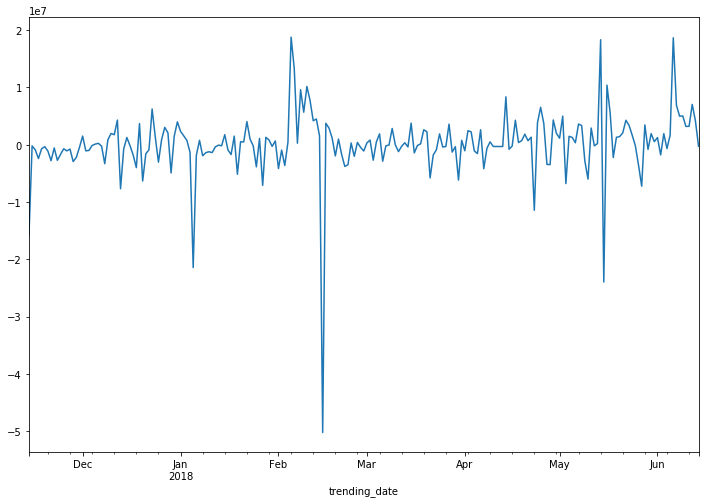

In [19]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arma_mod30.resid.plot(ax=ax);
plt.show()

In [20]:
from scipy import stats
resid = arma_mod30.resid
print(stats.normaltest(resid))

NormaltestResult(statistic=197.48530415913075, pvalue=1.3080100273542458e-43)


The normaltestresult() shows a pvalue=1.500685248904302e-11, since the p-value < 0.05 we can reject the null that the residuals are normally distributed. The plot shows a heavy tail. 

In [21]:
dta = dta.asfreq("1d")

In [22]:
import statsmodels.tsa.api as smt
mdl = smt.AR(dta).fit(maxlag=7, ic='aic', trend='nc')

In [23]:
est_order = smt.AR(dta).select_order(maxlag=12, ic='bic', trend='nc')

print(est_order)

/Users/stephanier/anaconda/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:612: RuntimeWarning: invalid value encountered in log
  invarcoefs = -np.log((1-params)/(1+params))
/Users/stephanier/anaconda/lib/python3.6/site-packages/numpy/linalg/linalg.py:1757: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)


1


/Users/stephanier/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [24]:
dta.head()

,views
trending_date,
2017-11-14,7753285.0
2017-11-15,8407922.0
2017-11-16,8423782.0
2017-11-17,7180424.0
2017-11-18,7526963.0


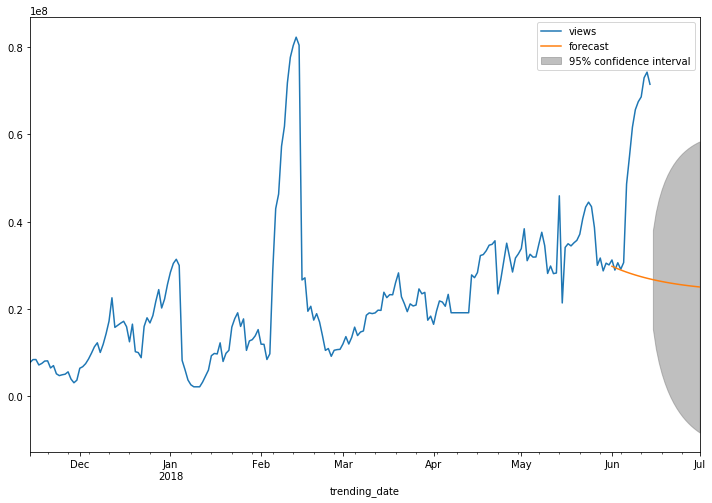

In [25]:
#predict_sunspots = arma_mod10.predict('2018-06-01', '2018-07-01', dynamic=True)
#print(predict_sunspots)

fig, ax = plt.subplots(figsize=(12, 8))
ax = dta.loc['2017-11-14':].plot(ax=ax)
fig = arma_mod10.plot_predict('2018-06-01', '2018-07-01', dynamic=True, ax=ax, plot_insample=False)
plt.show()

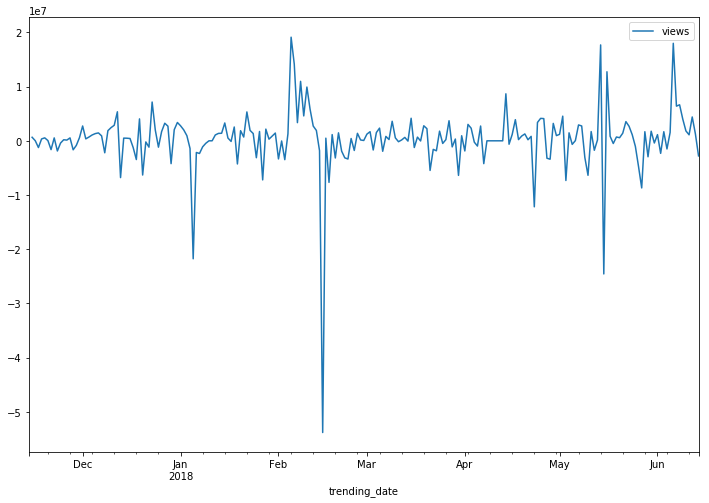

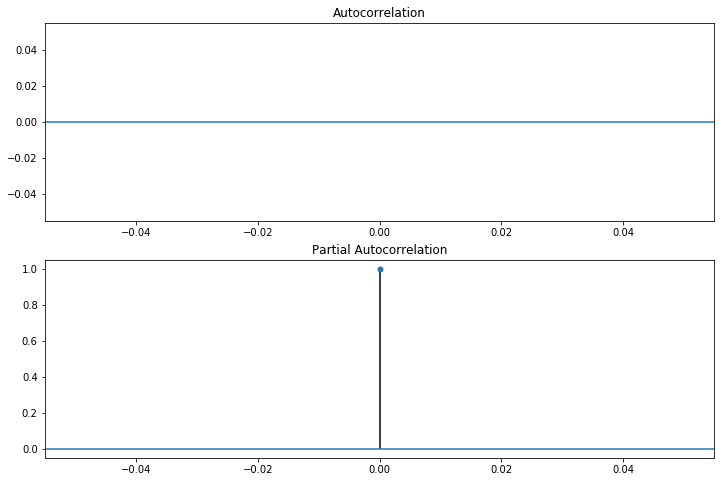

In [26]:
dta.diff().plot(figsize=(12,8));
plt.show()

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.diff().values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta.diff(), lags=40, ax=ax2)
plt.show()

In [27]:
arima = sm.tsa.ARIMA(dta, order=(2,1,1)).fit()

In [28]:
arima.arroots, arima.maroots

(array([ 2.3444324 , -2.90555687]), array([ 12.5170064]))

In [29]:
fig, ax = plt.subplots(1,1,figsize=(12, 8))
dta.plot(ax=ax);
arima.plot_predict(plot_insample=False, dynamic=True, start="2018-06-01", ax=ax);

I'm going to try to forecast for all categories using VARS.

In [30]:
dta = youtube_views.groupby('trending_date')['views','likes','dislikes','comment_count'].agg({"views": "sum","likes":"sum","dislikes":"sum","comment_count":"sum"})

In [31]:
dta = dta.reset_index()
dta = dta.rename(columns={ dta.columns[0]: "Date" })
dta.head()

,Date,views,likes,dislikes,comment_count
0,2017-11-14,185435246,7637635,270876,691402
1,2017-11-15,212445216,7601148,313577,709009
2,2017-11-16,227365391,7886807,338755,735962
3,2017-11-17,193541711,7143580,341176,814596
4,2017-11-18,196846875,8393717,322349,901370


# Comparing US Youtube Engagement with US economic data

Now I'm going to combine this data frame with s&p and dow jones index data and cryptocurrency data for the same time period.

In [32]:
sp500 = pd.read_csv("../data/snp500.csv")
dowjones = pd.read_csv("../data/dowjones.csv")
ethereum = pd.read_csv("../data/ETH-USD.csv")
bitcoin = pd.read_csv("../data/BTC-USD.csv")

In [33]:
#rename columns for after i merge tables
sp500 = sp500.add_prefix('s&p_')
dowjones = dowjones.add_prefix('dow_')
ethereum = ethereum.add_prefix("etc_")
bitcoin = bitcoin.add_prefix("btc_")



In [34]:
sp500 = sp500.rename(columns={ sp500.columns[0]: "Date" })
dowjones = dowjones.rename(columns={ dowjones.columns[0]: "Date" })
ethereum = ethereum.rename(columns={ ethereum.columns[0]: "Date" })
bitcoin = bitcoin.rename(columns={ bitcoin.columns[0]: "Date" })

In [35]:
#merge tables sp500,dowjones,ethereum,bitcoin,dta by date
from functools import reduce
data_frames = [sp500,dowjones, ethereum, bitcoin]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Date'],
                                            how='outer'), data_frames)

In [36]:
dta['Date'] = pd.to_datetime(dta['Date'])

In [37]:
df_merged['Date'] = pd.to_datetime(df_merged['Date'])

In [38]:
result = pd.merge(dta, df_merged, on='Date')

In [39]:
result.to_csv('../data/youtube_econ.csv')

In [40]:
#forward fill missing values
complete = result.fillna(method='ffill')

In [41]:
complete

,Date,views,likes,dislikes,comment_count,s&p_Open,s&p_High,s&p_Low,s&p_Close,s&p_Adj Close,...,etc_Low,etc_Close,etc_Adj Close,etc_Volume,btc_Open,btc_High,btc_Low,btc_Close,btc_Adj Close,btc_Volume
0,2017-11-14,185435246,7637635,270876,691402,2577.750000,2579.659912,2566.560059,2578.870117,2578.870117,...,314.450012,334.720001,334.720001,256426287,6522.450195,6728.589844,6419.180176,6597.060059,6597.060059,634604991
1,2017-11-15,212445216,7601148,313577,709009,2569.449951,2572.840088,2557.449951,2564.620117,2564.620117,...,324.880005,331.200012,331.200012,171713343,6597.060059,7330.060059,6596.939941,7283.220215,7283.220215,922959468
2,2017-11-16,227365391,7886807,338755,735962,2572.949951,2590.090088,2572.949951,2585.639893,2585.639893,...,321.899994,330.320007,330.320007,157426941,7283.020020,7964.640137,7119.169922,7853.680176,7853.680176,1010130763
3,2017-11-17,193541711,7143580,341176,814596,2582.939941,2583.959961,2577.620117,2578.850098,2578.850098,...,325.829987,331.720001,331.720001,124992568,7853.680176,8000.189941,7534.700195,7699.950195,7699.950195,917599923
4,2017-11-18,196846875,8393717,322349,901370,2582.939941,2583.959961,2577.620117,2578.850098,2578.850098,...,326.829987,346.649994,346.649994,141724984,7699.950195,7857.520020,7458.899902,7780.910156,7780.910156,571121111
5,2017-11-19,215052284,9382879,324972,910415,2582.939941,2583.959961,2577.620117,2578.850098,2578.850098,...,343.890015,354.600006,354.600006,225946121,7781.020020,8100.870117,7675.410156,8042.640137,8042.640137,541391321
6,2017-11-20,257000111,10377742,367519,1038231,2579.489990,2584.639893,2578.239990,2582.139893,2582.139893,...,354.279999,367.709991,367.709991,167626773,8042.640137,8294.120117,7947.279785,8244.690430,8244.690430,617354329
7,2017-11-21,272366796,10567383,360554,1034750,2589.169922,2601.189941,2589.169922,2599.030029,2599.030029,...,351.410004,360.519989,360.519989,251898109,8245.870117,8368.360352,7819.060059,8099.970215,8099.970215,938345413
8,2017-11-22,283346688,10543677,340612,1033128,2600.310059,2600.939941,2595.229980,2597.080078,2597.080078,...,359.970001,380.839996,380.839996,164317320,8099.919922,8304.370117,8091.629883,8234.549805,8234.549805,539697375
9,2017-11-23,279033536,9357437,298110,871763,2600.310059,2600.939941,2595.229980,2597.080078,2597.080078,...,375.440002,406.570007,406.570007,414164352,8234.500000,8266.549805,8012.350098,8013.410156,8013.410156,555465146


In [42]:
import numpy as np
import pandas
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR, DynamicVAR